In [2]:
### Import libraries ###
%matplotlib inline
import re
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lephare import statsplot as lsp

LEPHAREDIR is being set to the default cache directory:
/home/hallouin/.cache/lephare/data
More than 1Gb may be written there.
LEPHAREWORK is being set to the default cache directory:
/home/hallouin/.cache/lephare/work
Default work cache is already linked. 
This is linked to the run directory:
/home/hallouin/.cache/lephare/runs/20251013T115331


In [3]:
dc2 = pd.read_csv('/home/hallouin/Documents/t_hall/lephare/training_stats/simulation_catalogs/DC2/dp02_dc2_62.csv')
dc2 = dc2.dropna()
dc2

,mt_id_truth_type,mt_match_objectId,ts_ra,ts_dec,ts_truth_type,ts_is_pointsource,ts_redshift,obj_coord_ra,obj_coord_dec,obj_refExtendedness,...,rmag,imag,zmag,ymag,umag_err,gmag_err,rmag_err,imag_err,zmag_err,ymag_err
3,31411981094_2,1651413688361421449,61.944366,-36.507034,2,1,0.000000,61.944356,-36.507118,1.0,...,25.961597,25.452401,25.984570,24.876525,0.742865,0.249135,0.296967,0.585449,1.546722,2.725028
5,31411982728_2,1651413688361451863,61.944980,-36.517584,2,1,0.000000,61.945022,-36.517598,1.0,...,25.458261,24.611190,24.224103,24.008730,0.302665,0.108411,0.130497,0.256326,0.646691,1.143971
6,7943780948_1,1651413688361451723,61.826612,-36.523895,1,0,1.583830,61.826611,-36.523902,0.0,...,27.333583,26.705990,26.398789,25.543027,0.380385,0.124979,0.152746,0.286760,0.821362,1.714336
7,7943693455_1,1651413688361451008,61.834454,-36.527883,1,0,1.574190,61.834410,-36.527846,1.0,...,27.106075,27.495085,25.899755,25.413648,0.475560,0.159137,0.197178,0.361731,1.029083,2.067754
9,7942562735_1,1651413688361450766,61.844052,-36.529150,1,0,1.406630,61.844022,-36.529129,1.0,...,25.974539,25.917630,26.159017,26.046129,0.413118,0.140450,0.166759,0.319610,0.841113,1.636874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389072,7945365877_1,1651290543059148909,61.901237,-36.882347,1,0,1.819700,61.901248,-36.882354,1.0,...,25.208321,24.954217,24.842578,24.267990,0.120955,0.036944,0.041346,0.080011,0.226193,0.434724
389073,7937556894_1,1651343319617242060,62.214016,-36.764291,1,0,0.223015,62.214047,-36.764303,0.0,...,25.648740,25.602706,25.165273,25.539307,0.324876,0.109264,0.125137,0.245820,0.677128,1.428278
389074,7938263957_1,1651343319617244715,62.077497,-36.705900,1,0,0.624259,62.077490,-36.705880,1.0,...,25.562560,24.937279,24.869845,24.877324,0.359569,0.118269,0.142998,0.271518,0.677786,1.380787
389075,7939442820_1,1651352115710265560,61.992653,-36.734153,1,0,0.942635,61.992615,-36.734149,0.0,...,26.414832,25.482749,25.095093,24.341662,0.684010,0.213506,0.255672,0.494887,1.322551,2.882764


/tmp/ipykernel_6590/1908715700.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dc2_stars = dc2_stars[snr_mask]
/tmp/ipykernel_6590/1908715700.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dc2_gal = dc2_gal[snr_mask]


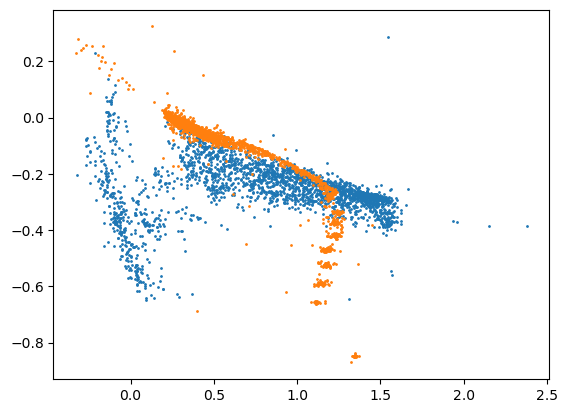

In [10]:
snr_mask = dc2['gmag']/dc2['gmag_err'] > 5000
dc2_stars = dc2[dc2['ts_truth_type'] == 2]
dc2_stars = dc2_stars[snr_mask]
dc2_gal = dc2[dc2['ts_truth_type'] == 1]
dc2_gal = dc2_gal[snr_mask]


plt.figure()

plt.scatter(dc2_gal['gmag']-dc2_gal['rmag'], dc2_gal['zmag'] - dc2_gal['imag'], s=1)
plt.scatter(dc2_stars['gmag']-dc2_stars['rmag'], dc2_stars['zmag'] - dc2_stars['imag'], s=1)

plt.show()